# Challenge 3: Optimization using gradient methods

## BIOS 26211 winter 2023

## Your Name: Keegan Ballantyne


In [2]:
# Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities
import pandas as pd
import math as m
from scipy import stats

## Motivation: fitting data with log-transform linear regression

### Protein expression data

You will find a data file called `KaiC_data.csv` which contains the data of concentration of the circadian protein KaiC as a function of time. The file contains two variables: Time (in hours) and KaiC (in arbitrary units), which was transformed to decay to 0 instead of approaching a positive asymptote. 

We will use the log-transform of the dependent variable, which has a linear relationship with time:
$$ 
KaiC=ae^{kt}
$$

$$
 \log(KaiC) = \log(a)+kt
$$

The following script uses the linear regression function `stats.linregress` on the log-transformed data for KaiC to calculate the best-fit parameters a and k (remember than the intercept returned by linear regression is the log of a!). 

Use see the scatterplot of the data and the fit of an exponential function with the parameters from linear regression, and the calculation for the sum of squared errors between the measured and predicted KaiC values.

   Time  Amount
0     0  59.823
1     1  30.916
2     2  17.686
3     3  10.901
4     4   5.463
The correlation coefficient is -0.8916797336619134
The exponential rate constant k is -0.42607989987461925
The multiplicative constant a is 33.68027592402027


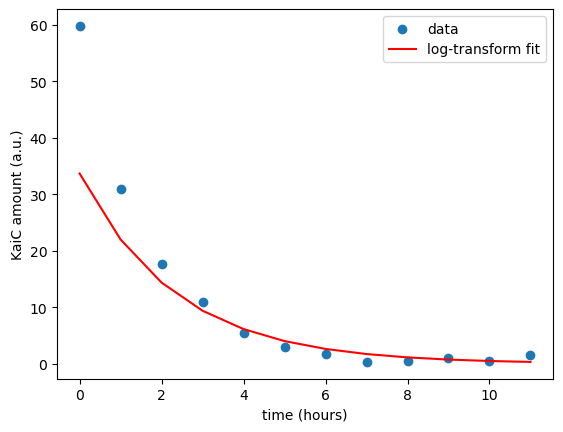

The sum of squared errors is 782.6107982220933


In [3]:
KaiC = pd.read_csv("KaiC_data.csv")
print(KaiC.head())
Time = np.array(KaiC.Time)
Amount = np.array(KaiC.Amount)

slope, intercept, r, p_value, std_err = stats.linregress(Time,np.log(Amount))
print("The correlation coefficient is", r)
print("The exponential rate constant k is", slope)
print("The multiplicative constant a is", np.exp(intercept))

Amount_pred = np.exp(intercept)*np.exp(slope*Time)

plt.scatter(Time, Amount, label = 'data')
plt.plot(Time, Amount_pred, 'r', label = 'log-transform fit')
plt.xlabel('time (hours)')
plt.ylabel('KaiC amount (a.u.)')
plt.legend()
plt.show()

SSE = sum((Amount-Amount_pred)**2)
print("The sum of squared errors is", SSE)

In [4]:
KaiC.head()
print(KaiC.dtypes)

Time        int64
Amount    float64
dtype: object


### COVID data from Italy

The script below uses the data set from the first two months of the COVID outbreak for all of Italy in the file `Italy_COVID.csv`. It follows the same steps as above to fit the log-transformed data using the linear regression function and report the quality of the fit and show the plot of the data and the best-fit exponential and calculates the sum of squared errors as the measure of the goodness of fit.

The correlation coefficient is 0.9672024346207484
The exponential rate constant k is 0.23950491434446314
The multiplicative constant a is 0.49522571477179633


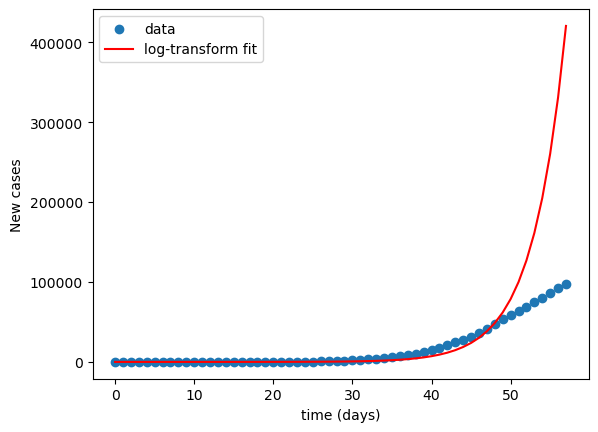

The sum of squared errors is 220041944113.39355


In [5]:
Italy = pd.read_csv("Italy_COVID.csv")
Italy.head()
cases = Italy.cases
time = np.arange(0, len(cases))

slope, intercept, r, p_value, std_err = stats.linregress(time,np.log(cases))
print("The correlation coefficient is", r)
print("The exponential rate constant k is", slope)
print("The multiplicative constant a is", np.exp(intercept))

cases_pred = np.exp(intercept)*np.exp(slope*time)

plt.scatter(time, cases, label = 'data')
plt.plot(time, cases_pred, 'r', label = 'log-transform fit')
plt.xlabel('time (days)')
plt.ylabel('New cases')
plt.legend()
plt.show()

SSE = sum((cases-cases_pred)**2)
print("The sum of squared errors is", SSE)

## Part 1: Multidimensional optimization of quadratic functions 

The following are exercises in implementing multidimensional optimization algorithms in the case of a quadratic function with known linear and quardatic terms, as follows:

$$ 
f( \vec x)  = \frac{1}{2}\vec x^T \mathbf A \vec x - \vec b \vec x  
$$

(where f(x) is a scalar, x is a vector, b is a vector, and A is a matrix)

Here are the values for testing your code and a contour plot of the two objective functions based on quadratic forms A1 and A2:

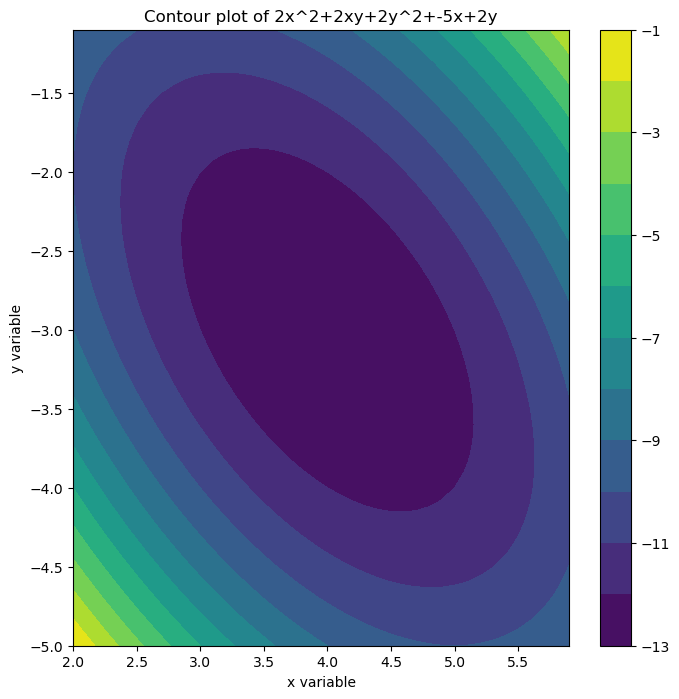

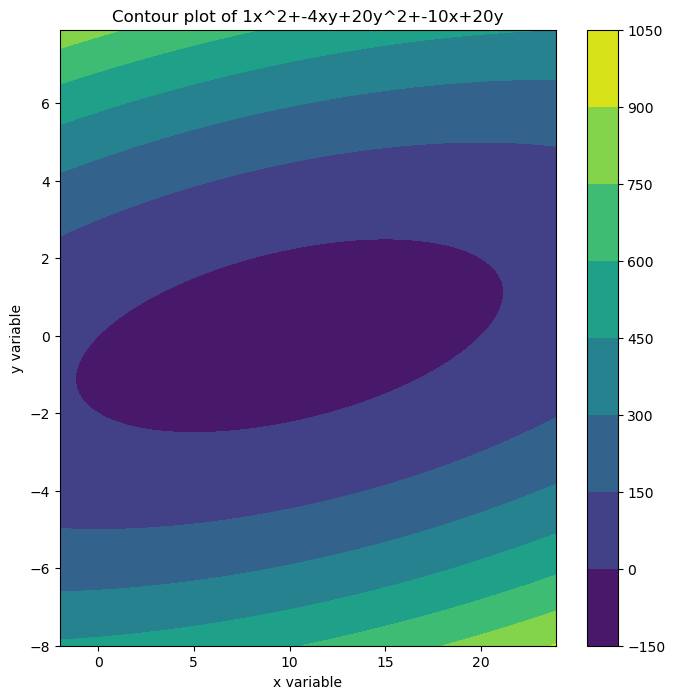

In [6]:
# First quadratic form
A1 = np.array([[2, 1],[ 1, 2 ]]) # the quadratic (Hessian) matrix
b1=np.array([5, -2]) # the linear vector term

dx = 0.1
x1 = np.arange(2.0, 6.0, dx)
x2 = np.arange(-5.0, -1.0, dx)
X1 ,X2 = np.meshgrid(x1, x2)
Z = 0.5*A1[0,0]*X1**2 + A1[0,1]*X1*X2 + 0.5*A1[1,1]*X2**2 -b1[0]*X1 - b1[1]*X2
fig, ax = plt.subplots(figsize=(8,8))
cf = ax.contourf(X1, X2, Z, levels = 12)
fig.colorbar(cf, ax=ax)
ax.set_xlabel('x variable')
ax.set_ylabel('y variable')
ax.set_title('Contour plot of '+str(A1[0,0])+"x^2+"+str(A1[1,0]+A1[0,1])+"xy+"+str(A1[1,1])+
             "y^2+"+str(-b1[0])+"x+"+str(-b1[1])+"y")
plt.show()

# Second quadratic form
A2 = np.array([[1, -2],[ -2, 20]])  # the quadratic (Hessian) matrix
b2 = np.array([10, -20])  # the linear vector term

dx = 0.1
x1 = np.arange(-2.0, 24.0, dx)
x2 = np.arange(-8.0, 8.0, dx)
X1 ,X2 = np.meshgrid(x1, x2)
Z = 0.5*A2[0,0]*X1**2 + A2[0,1]*X1*X2 + 0.5*A2[1,1]*X2**2 -b2[0]*X1 - b2[1]*X2
fig, ax = plt.subplots(figsize=(8,8))
cf = ax.contourf(X1, X2, Z)
fig.colorbar(cf, ax=ax)
ax.set_xlabel('x variable')
ax.set_ylabel('y variable')
ax.set_title('Contour plot of '+str(A2[0,0])+"x^2+"+str(A2[1,0]+A2[0,1])+"xy+"+str(A2[1,1])+
             "y^2+"+str(-b2[0])+"x+"+str(-b2[1])+"y")
plt.show()

### 1.1 Supporting functions

1. Write a function to return the value of the quadratic form f(x) as defined above for a given matrix A, vector b, and vector x. The output should be a scalar number. Test it using the two quadratic forms (with A1 and b1) and (with A2 and b2) defined above. CHECK for A1 and b1, the value of the quadratic function at the vector [0,1] should be 3; for A2 and b2, the value of the quadratic function at the vector [0,1] should be 30.

2. Write another function to return the gradient of the given quadratic form f(x) for a given matrix A, vector b, and vector x. It should return a vector of the two partial derivatives of f(x) w.r.t. the two components x1 and x2.  Test it using the two quadratic forms (with A1 and b1) and (with A2 and b2) defined above. CHECK for A1 and b1, the value of the gradient at the vector [0,1] should be [-4.4]; for A2 and b2, the value of the gradient at the vector [0,1] should be [-12,40].


In [7]:
def quad_fun(matA, vecb, vecx):
    y = 0.5*vecx.T@matA@vecx - vecb@vecx    
    return y

x1 = np.array([0,1])

y = quad_fun(A1, b1, x1)
print(y)

y = quad_fun(A2, b2, x1)
print(y)

def quad_grad(matA, vecb, vecx):
    g = matA@vecx - vecb
    return g

g = quad_grad(A1, b1, x1)
print(g)

g = quad_grad(A2, b2, x1)
print(g)


3.0
30.0
[-4  4]
[-12  40]


### 1.2 Gradient descent

Implement the *gradient descent* method for a quadratic form.

* Inputs: matrix A, vector b, initial guess x0, max number of steps, tolerance tol, learning rate

* DO: starting at x0, take a step down the gradient (call gradient function and quadratic function from 2.1) multiplied by learning rate r, repeat until the step is less than tolerance or max number of steps is exceeded

* Outputs: final vector x, number of steps taken.

The tricky step is determining how far to move down the gradient - it can be done by  implementing a golden section search, or any other one-dimensional optimization algorithm. The easiest way to it is to choose a constant multiple, called the learning rate, as shown in the example code. You can also choose to add a momentum parameter if you wish!

Test the performance of your function using the matrices A1 and A2 (CHECK: the true minimum is the solution of the linear equation $Ax = b$.) Try different starting values with tolerance of 1e-5, and report the number of steps it took to converge.

In [8]:
def obj_fun (x, y, parms): # objective function for linear regression
    a = parms[0]
    b = parms[1]
    return np.sum(a*x + b - y)**2

def grad_fun (x, y, parms): # gradient for linear regression
    a = parms[0]
    b = parms[1]
    return np.array([2*np.sum((a*x+b -y)*x),2*np.sum(a*x+b -y)])

def grad_lin_reg(x, y, x0, rate, tol, max_iter):
    count = 0 # initial count
    diff = 1.0e10 # initial difference
    while count<max_iter and diff>tol:
        best = x0 - rate*grad_fun(x,y,x0)
        diff = np.abs(obj_fun(x,y,x0) - obj_fun(x,y,best))
        x0 = best
        count = count+1
    return best, count

a = 0.4 # slope
b = -10 # intercept
w = 3 # noise strength
rng = np.random.RandomState(1)
x = 10 * rng.rand(50) # random x values between 0 and 10
y = a * x + b + w*rng.randn(50) # linear model plus random normal noise

guess = np.array([0,0])

rate = 0.0005 # learning rate
best, count = grad_lin_reg(x,y, guess, rate, 1e-5, 10000)
print("Best slope and intercept:", best, "number of iterations:", count)F

Best slope and intercept: [ 0.48143882 -9.99449252] number of iterations: 609


In [9]:
def quad_grad_desc(matA, vecB, x0, max_steps, tol, rate):
    """Implements the gradient descent method for a quadratic function"""
    count = 0
    diff = 1.0e10
    # take a step down the gradient (call gradient function and quadratic function from 2.1) 
    # multiplied by learning rate r
    while count<max_steps and diff>tol:
        best = x0 - rate*quad_grad(matA, vecB, x0)
        diff = np.abs(quad_fun(matA, vecB, x0)-quad_fun(matA, vecB, best))
        x0 = best
        count = count+1
    return best, count

# First quadratic form
A1 = np.array([[2, 1],[ 1, 2 ]]) # the quadratic (Hessian) matrix
b1=np.array([5, -2]) # the linear vector term

matA1 = A1
vecB1 = b1

# Second quadratic form
A2 = np.array([[1, -2],[ -2, 20]])  # the quadratic (Hessian) matrix
b2 = np.array([10, -20])  # the linear vector term

matA2 = A2
vecB2 = b2
tol = 1e-5
x0 = np.array([0,0])
max_steps = 10000
rate = 0.0005

bestA1, countA1 = quad_grad_desc(matA1, vecB1, x0, max_steps, tol, rate)
print(bestA1, countA1)

bestA2, countA2 = quad_grad_desc(matA2, vecB2, x0, max_steps, tol, rate)
print(bestA2, countA2)

#check using np.linalg.solve(A1, B1)

[ 3.9000425  -2.90006566] 7110
[ 9.81133119 -0.01964457] 10000


### 1.3 Newton-Raphson method 

Implement the Newton-Raphson method for a quadratic form

* Input: matrix A, vector b, initial guess x0, max number of steps, tolerance tol

* DO: starting at x0, call the gradient function and the quadratic function from 2.1, take a step according to Newton-Raphson, repeat until the step is less than tolerance or max number of steps is exceeded

* Outputs: final vector x, number of steps taken.

Test the function using both Hessian matrices A1 and A2. Try different starting values and use a tolerance of 1e-5, and report the number of
steps it took to converge. 

In [13]:
def NR_grad_desc(matA, vecB, x0, max_steps, tol):
    """Implements the gradient descent method for a quadratic function"""
    count = 0
    diff = 1.0e10
    # take a step down the gradient (call gradient function and quadratic function from 2.1) 
    # multiplied by learning rate r
    while count<max_steps and diff>tol:
        best = x0 - np.linalg.solve(matA, quad_grad(matA, vecB, x0))
        diff = np.abs(quad_fun(matA, vecB, x0)-quad_fun(matA, vecB, best))
        x0 = best
        count = count+1
    return best, count

# First quadratic form
A1 = np.array([[2, 1],[ 1, 2 ]]) # the quadratic (Hessian) matrix
b1=np.array([5, -2]) # the linear vector term

matA1 = A1
vecB1 = b1

# Second quadratic form
A2 = np.array([[1, -2],[ -2, 20]])  # the quadratic (Hessian) matrix
b2 = np.array([10, -20])  # the linear vector term

matA2 = A2
vecB2 = b2
tol - 1e-5
x0 = np.array([-2,10])
max_steps = 4
rate = 0.0005

bestA1, countA1 = NR_grad_desc(matA1, vecB1, x0, max_steps, tol)
print(bestA1, countA1)

bestA2, countA2 = NR_grad_desc(matA2, vecB2, x0, max_steps, tol)
print(bestA2, countA2)

#check using np.linalg.solve(A1, B1)

[ 4. -3.] 2
[10.  0.] 2


### 1.4 Levenberg-Marquardt method

In this part you will implement the Levenberg-Marquardt method for the quadratic forms. This method essentially interpolates between gradient descent and Newton-Raphson.

Write a function to implement the L-M method for the quadratic forms given above using the pseudocode:

 * Input: matrix A, vector b, initial guess x0, max number of steps, tolerance tol, scaling factor 
 
 * DO: starting at x0, call the gradient function and the quadratic function from 2.1, take a step according to Levenberg-Marquardt, repeat until the step is less than tolerance or max number of steps is exceeded

* Outputs: final vector x, number of steps taken.

Test the function using both Hessian matrices A1 and A2. Try different starting values and use a tolerance of 1e-5, and report the number of steps it took to converge. 


In [14]:
def LM_grad_desc(matA, vecB, guess, max_steps, tol, scale):
    """Implements the gradient descent method for a quadratic function"""
    count = 0
    diff = 1e5
    lamda = 100
    # take a step down the gradient (call gradient function and quadratic function from 2.1) 
    # multiplied by learning rate r
    while (count<max_steps) and (diff>tol):
        best = guess - np.linalg.solve(matA + lamda*np.diag(np.diag(matA)), quad_grad(matA, vecB, guess))
        diff = np.abs(quad_fun(matA, vecB, guess)-quad_fun(matA, vecB, best))
        if quad_fun(matA, vecB, best) <  quad_fun(matA, vecB, guess): 
            guess = best
            lamda = lamda/scale
        else:
            lamda = lamda*scale
        count = count+1
    return best, count

# First quadratic form
A1 = np.array([[2, 1],[ 1, 2 ]]) # the quadratic (Hessian) matrix
b1 = np.array([5, -2]) # the linear vector term

matA1 = A1
vecB1 = b1

# Second quadratic form
A2 = np.array([[1, -2],[ -2, 20]])  # the quadratic (Hessian) matrix
b2 = np.array([10, -20])  # the linear vector term

matA2 = A2
vecB2 = b2
max_steps = 10000
guess = np.array([0,0])
tol = 1e-5
rate = 0.0005
scale = 2

bestA1, countA1 = LM_grad_desc(matA1, vecB1, guess, max_steps, tol, scale)
print(bestA1, countA1)


bestA2, countA2 = LM_grad_desc(matA2, vecB2, guess, max_steps, tol, scale)
print(bestA2, countA2)               

[ 3.99990004 -2.99990009] 13
[ 9.99991294e+00 -1.93076991e-05] 13


## Part 2: Application to curve-fitting

Gradient based optimization is frequently used for challenging curve-fitting, such as exponential curve-fitting. We will implement first the simpler gradient descent and then the more sophisticated Levenberg-Marquardt method to find the optimal parameters for the exponential function with parameters $a$ and $k$:
 
$$
f(x; a,k) = ae^{kx} 
$$


### 2.2 Auxilliary functions for nonlinear least squares

1. Write a function to compute the sum of square errors (the objective function):

    $$ SSE = \sum_i (ae^{kx_i} - y_i)^2 $$

    * Input: vector x, vector y, values a and k 

    * DO: add up all the square differences between predicted and actual  values of y (should be one line).

    * Output: the sum of square differences - a single scalar. 

2. Write a function to calculate the gradient (G) for the nonlinear least squares optimization. 

    * Input: vector x (data), vector y (data),  values a and k 

    * DO: 
    
    * The gradient component in the direction of parameter a is the sum over all data points:    
       $$ G[0] = \sum_i  (f(x_i; a, k)-y_i) \frac{\partial f(x_i; a, k)}{\partial a}$$ 
    * The gradient component in the direction of parameter k is the sum over all data points: 
       $$ G[1] = \sum_i  (f(x_i; a, k)-y_i) \frac{\partial f(x_i; a, k)}{\partial k}$$ 
    * You'll have to calculate the partial derivatives of the function with respect to a and k on paper and then implement them.
    * Important: the multiplications inside the sums involve arrays and need to be done element by element. See https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.multiply.html

    * Output: vector G (1 by 2)
    
3. Write a function to calculate the Hessian for the nonlinear least squares optimization. 

    * Input: vector x (data), vector y (data),  values a and k 

    * DO: Calculate the Hessian matrix, with each element a sum over all the data points:
     *  $$H[0,0] = \sum_i \left(\frac{\partial f (x_i; a, k)}{\partial a} \right)^2 $$
     * $$H[1,1] = \sum_i  \left(\frac{\partial f (x_i; a, k)}{\partial k}\right)^2$$
     * $$H[0,1] = H[1,0]= \sum_i \frac{\partial f (x_i; a, k)}{\partial a} \frac{\partial f (x_i; a, k)}{\partial k}$$ 
     * You'll have to calculate the partial derivatives of the function with respect to a and k on paper and then implement them.
     * Important: the multiplications inside the sums involve arrays and need to be done element by element. See https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.multiply.html

    * Output:  matrix H (2 by 2).
    


Test your functions with KaiC data, using parameters a=10 and k=-0.5. You should get (pay attention to the shape of the arrays!)

SSE = 3397.7197634698623 

G = [[ -72.80278399],[-348.94647508]]


H = [[1.58196699, 9.20551297],[9.20551297, 199.07470824]]

In [15]:
def sse_func(vecx, vecy, a, k):
    """Computes the sum squared errors of two vectors x and y"""
    
    y = vecy
    x = vecx
    SSE = np.sum(((a*np.exp(k*x))-y)**2)
    return SSE

vecx = KaiC["Time"]
vecy = KaiC["Amount"]
a = 10
k = -0.5

SSE = sse_func(vecx, vecy, a, k)
SSE

3397.7197634698623

In [16]:
def grad_func(vecx, vecy, a, k):
    """Computes the gradient (G) for the nonlinear least squares optimization"""
    
    new_a = np.exp(k*vecx)
    new_k = vecx*a*np.exp(k*vecx)
    empty_m = np.array([[0.0], [0.0]])
    empty_m[0] = np.sum(((a*np.exp(k*vecx))-vecy)*new_a)
    empty_m[1] = np.sum(((a*np.exp(k*vecx))-vecy)*new_k)
    
    return(empty_m)

vecx = KaiC["Time"]
vecy = KaiC["Amount"]
a = 10
k = -0.5

print(grad_func(vecx, vecy, a, k))


[[ -72.80278399]
 [-348.94647508]]


In [17]:
def hess_func(vecx, vecy, a, k):
    """Calculates the Hessian matrix nonlinear least squares optimization"""
    
    new_a = np.exp(k*vecx)
    new_k = vecx*a*np.exp(k*vecx)
    m = np.array([[0.0,0.0],[0.0,0.0]])
    m[0,0] = np.sum(new_a**2)
    m[1,1] = np.sum(new_k**2)
    m[0,1] = np.sum(new_a*new_k)
    m[1,0] = np.sum(new_a*new_k)
    
    return(m)

vecx = KaiC["Time"]
vecy = KaiC["Amount"]
a = 10
k = -0.5

print(hess_func(vecx, vecy, a, k))

[[  1.58196699   9.20551297]
 [  9.20551297 199.07470824]]


### 2.2 Gradient descent for exponential curve-fitting

Modify your gradient descent code from part 1 above to use it for fitting an exponential curve to a set of x and y values. This means replacing the gradientwith your new gradient function from part 2.1

Gradient descent for  method for finding best-fit exponential parameters a and k:

* Input: initial values a0, k0, vector x, vector y, max number of steps,  tolerance, learning rate
* DO: Perform gradient descent optimization, using the functions you wrote in 2.1 for the objective function and the gradient
* Output: best fit parameters a and k, and the number of steps it took to converge.

Use starting parameters given above a=10 and k=-0.5 and experiment with different values of learning rate r. Hint: if your optimization is not converging, try smaller learning rate and larger number of max steps!

Report what optimal values of a and k you can find and how many steps it takes for gradient descent to converge.

In [18]:
def exp_grad(a0 ,k0, vecx, vecy, max_steps, tol, r):
    """asghsja"""
    
    currenta = a0
    currentk = k0
    currentx = np.array([[currenta],[currentk]])
    step = 0
    current_tol = 100
    
    while step<max_steps and current_tol>tol:
        newg = grad_func(vecx, vecy, currenta, currentk)
        newx = currentx-r*newg
        current_tol = np.linalg.norm(currentx-newx)
        step += 1
        currentx = newx
        currenta = currentx[0]
        currentk = currentx[1]
    return currentx, step

a0 = 10
k0 = -0.5
vecx = KaiC["Time"]
vecy = KaiC["Amount"]
max_steps = 1000000
tol = 1e-5
r = 0.0001

currentx, step = exp_grad(a0, k0, vecx, vecy, max_steps, tol, r)
print(currentx, step)

# a0=50
# k0=-2

[[59.19780788]
 [-0.60512087]] 56051


## Part 3 L-M for nonlinear curve-fitting


### 3.1 L-M implementation for exponential models

Modify the function from 1.4 to implement the Levenberg-Marquardt  method for finding best-fit parameters a and k for exponential curve-fitting.

* Input: initial values a0, k0, vector x, vector y, max number of steps,  tolerance, scaling factor 
* DO: Perform L-M optimization, use the functions you wrote in 2.1 for the objective function, the gradient, and the Hessian
* Output: best fit parameters a and k, and the number of steps it took to converge.

Apply the L-M function to fitting the KaiC data set. Try different starting values of a and k, and report how quickly the optimization converges. Plot the data as a scatterplot and overlay plots of two exponential functions: one with parameters from log-transformed linear regression, and the other from Levenberg-Marquardt optimization. Report the sum of squared differences for the nonlinear fit and compare it with the log-transform fit.

[[59.28974017]
 [-0.60598575]] 16
The correlation coefficient is -0.8916797336619134
The exponential rate constant k is -0.42607989987461925
The multiplicative constant a is 33.68027592402027


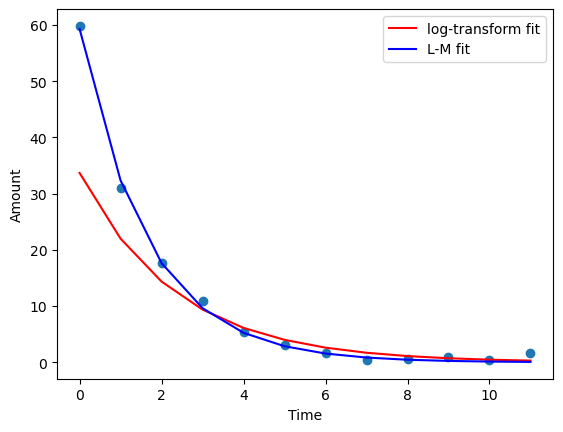

The sum of squared differences for nonlinear fit is  782.6107982220933
The sum of squared differences for Levenberg-Marquardt is  7.243426946877534


In [21]:
def LM_exp(a0, k0, vecx, vecy, max_steps, tol, scale):
    currenta = a0
    currentk = k0
    currentx = np.array([[currenta],[currentk]])
    step = 0
    current_tol = 100
    lamda = 100
    
    while step<max_steps and current_tol>tol:
        newg = grad_func(vecx, vecy, currenta, currentk)
        newh = hess_func(vecx, vecy, currenta, currentk)
        newx = currentx-np.linalg.inv(newh+lamda*(np.diag(np.diag(newh))))@newg
        current_tol = np.linalg.norm(currentx-newx)
        step = step+1
        
        if sse_func(vecx, vecy, newx[0], newx[1]) < sse_func(vecx, vecy, currentx[0], currentx[1]):
            lamda = lamda/scale
            currentx = newx
            currenta = currentx[0]
            currentk = currentx[1]
        else:
            lamda=lamda*scale
            
    return currentx, step

a0=50
k0=-2
vecx = KaiC["Time"]
vecy = KaiC["Amount"]
max_steps=1000000
tol=1e-5
scale=2

x_current, current_step = LM_exp(a0, k0, vecx, vecy, max_steps, tol, scale)

print(x_current, current_step)

y=x_current[0]*np.exp(x_current[1]*vecx)

# KaiC = pd.read_csv("KaiC_data.csv")
# print(KaiC.head())
Time = np.array(KaiC.Time)
Amount = np.array(KaiC.Amount)

slope, intercept, r, p_value, std_err = stats.linregress(Time,np.log(Amount))
print("The correlation coefficient is", r)
print("The exponential rate constant k is", slope)
print("The multiplicative constant a is", np.exp(intercept))

Amount_pred = np.exp(intercept)*np.exp(slope*vecx)

plt.scatter(vecx, vecy)
plt.plot(vecx, Amount_pred, 'r', label = 'log-transform fit')
plt.plot(vecx, y, 'b', label = 'L-M fit')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.show()

SSE = sum((vecy-Amount_pred)**2)
print("The sum of squared differences for nonlinear fit is ", SSE)
SSE_LM = sum((vecy-y)**2)
print("The sum of squared differences for Levenberg-Marquardt is ", SSE_LM)

### 3.2 Fitting COVID data

Apply the L-M algorithm to fitting the COVID incidence data from Italy. Once again, try different starting values of a and k, and report how quickly the optimization converges. Plot the data as a scatterplot and overlay plots of two exponential functions: one with parameters from log-transformed linear regression, and the other from Levenberg-Marquardt optimization. Report the sum of squared differences for the nonlinear fit and compare it with the log-transform fit.


[[2.51710448e+02]
 [1.06391299e-01]] 59
[[2.51710448e+02]
 [1.06391299e-01]] 43


/var/folders/d0/fxj44wqx1gg93vzw2qsyk67w0000gn/T/ipykernel_36968/3958848663.py:6: RuntimeWarning: overflow encountered in exp
  SSE = np.sum(((a*np.exp(k*x))-y)**2)
/var/folders/d0/fxj44wqx1gg93vzw2qsyk67w0000gn/T/ipykernel_36968/3958848663.py:6: RuntimeWarning: overflow encountered in multiply
  SSE = np.sum(((a*np.exp(k*x))-y)**2)


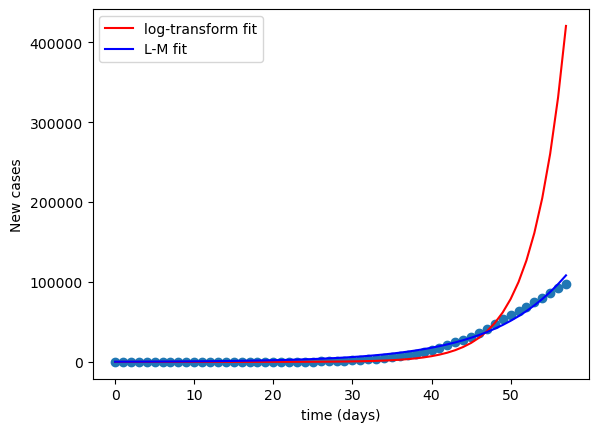

The sum of squared differences for nonlinear fit is  220041944113.39355
The sum of squared differences for Levenberg-Marquardt is  699403404.0968766


In [17]:
a0 = 50
k0 = -2
vecx = time
vecy = cases
max_steps = 1000000
tol = 1e-5
scale = 2

x_current, current_step = LM_exp(a0, k0, vecx, vecy, max_steps, tol, scale)
print(x_current, current_step)

a0=2
k0=-1

x_current, current_step = LM_exp(a0, k0, vecx, vecy, max_steps, tol, scale)
print(x_current, current_step)

y=x_current[0]*np.exp(x_current[1]*time)

cases_pred = np.exp(intercept)*np.exp(slope*time)
plt.scatter(time, cases)
plt.plot(time, cases_pred, 'r', label = 'log-transform fit')
plt.plot(time, y, 'b', label = 'L-M fit')
plt.xlabel('time (days)')
plt.ylabel('New cases')
plt.legend()
plt.show()

SSE = sum((cases-cases_pred)**2)
print("The sum of squared differences for nonlinear fit is ", SSE)
SSE_LM = sum((cases-y)**2)
print("The sum of squared differences for Levenberg-Marquardt is ", SSE_LM)